In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("iris.csv")

In [4]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,SETOSA
1,4.9,3.0,1.4,0.2,SETOSA
2,4.7,3.2,1.3,0.2,SETOSA
3,4.6,3.1,1.5,0.2,SETOSA
4,5.0,3.6,1.4,0.2,SETOSA
5,5.4,3.9,1.7,0.4,SETOSA
6,4.6,3.4,1.4,0.3,SETOSA
7,5.0,3.4,1.5,0.2,SETOSA
8,4.4,2.9,1.4,0.2,SETOSA
9,4.9,3.1,1.5,0.1,SETOSA


In [6]:
X = np.array(df.drop('target',1))
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
## O NÚMERO MÁXIMO DE POSSÍVEIS CLUSTERS É N. A QUANTIDADE DE EXPERIÊNCIAS
K = range(1,10) 

In [11]:
# k means determine k
distortions = []

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

[[5.84333333 3.054      3.75866667 1.19866667]]
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [5.00566038 3.36037736 1.56226415 0.28867925]]
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
[[5.006      3.418      1.464      0.244     ]
 [6.2525     2.855      4.815      1.625     ]
 [6.9125     3.1        5.846875   2.13125   ]
 [5.53214286 2.63571429 3.96071429 1.22857143]]
[[5.006      3.418      1.464      0.244     ]
 [6.20769231 2.85384615 4.74615385 1.56410256]
 [5.508      2.6        3.908      1.204     ]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [7.475      3.125      6.3        2.05      ]]
[[4.725      3.13333333 1.42083333 0.19166667]
 [6.52916667 3.05833333 5.50833333 2.1625    ]
 [6.20769231 2.85384615 4.74615385 1.56410256]
 [5.26538462 3.68076923 1.50384615 0.29230769]
 [5.508      2.6        3.908      1.204     ]
 [7.475      3.125      6.3        2.05      ]]
[[6.329

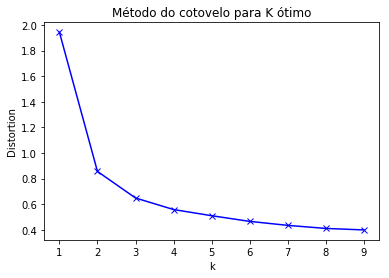

In [10]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Método do cotovelo para K ótimo')
plt.show()
 